In [27]:
import pandas as pd
perch_full = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [28]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [29]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
# 2개의 특성이 6개의 특성이 됨 인풋데이터의 제곱과, 두개의 곱, 그리고 1 그래서 총 6개. 그러나 사이킷런의 선형모델은 자동으로 절편을 추가하므로 1을제거 include_bias = False . 안해도 자동제거 되지만 명시
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [31]:
# 실제 적용
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
poly.get_feature_names_out()

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2'],
      dtype=object)

In [32]:
test_poly = poly.transform(test_input)

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [23]:
poly.fit(test_input)
test_poly = poly.transform(test_input)
lr.fit(test_poly,test_target)
print(lr.score(test_poly, test_target))

0.9974916793472933


In [41]:
# 5제곱 특성
poly = PolynomialFeatures(degree=5,include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

lr.fit(train_poly,train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

(42, 55)
0.9999999999996433
-144.40579436844948


In [44]:
# 음수가 나온건 과적합 상황 . 데이터ㅜ는적은데 모델이 훈련 데이터는 거의 외워버리고 테스트 데이터에는 엉뚱한 예측을 함 > 차수 줄이기, 규제
# 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [46]:
# 릿지 라쏘 훈련  선형회귀 모델에 규제를 추가한 모델 릿지=> 계수를 제곱한값으로 규제, 라쏘
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [48]:
print(ridge.score(test_scaled,test_target))

0.9790693977615387


In [54]:
# alpha매개변수로 규제 강도 조절 alpha 값이 크면 규제 강도가 세짐으로 계수 값을 줄여 과소적합유도
# 적절한 alpha 값을 찾는법은 alpha 값에 대한 r^2의 그래프를 그려보는거
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [55]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled,train_target))
  test_score.append(ridge.score(test_scaled,test_target))

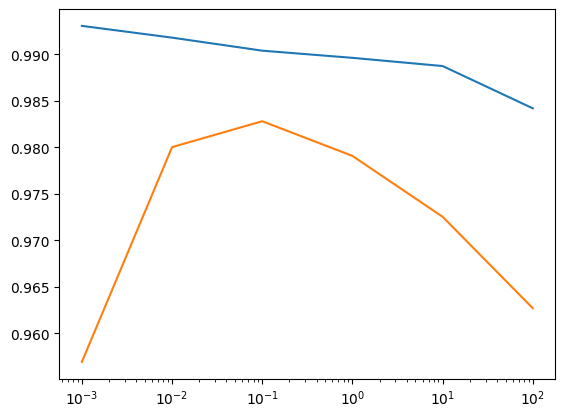

In [57]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.show()
# 가장 가까운 지점 0.1 즉 알파값 0.1 로 두고

In [59]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9903815817570367
0.9827976465386928


In [61]:
# 라쏘모델로 훈련 절댓값으로 규제
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled,train_target))

0.989789897208096


In [63]:
print(lasso.score(test_scaled,test_target))

0.9800593698421883


In [65]:
train_score =[]
test_score =[]
alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter=10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


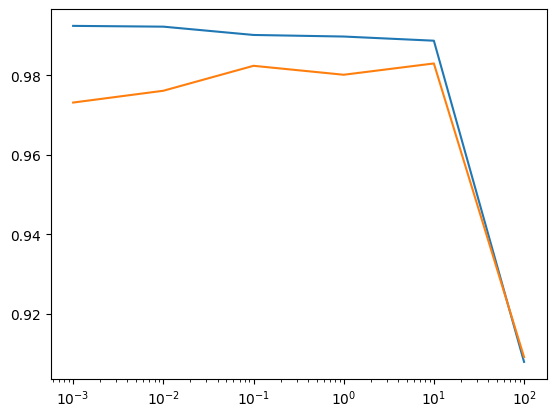

In [70]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.show()

In [72]:
# 라쏘모델 alpht 10 로 훈련
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.9888067471131867
0.9824470598706695


In [ ]:
# 마무리
# 다중회귀 사용 특성이 많으면 선형회귀는 강력함, 릿지 와 라쏘 는 선형 모델 중하나 이며 알파를 이용하여 특성 규제를하여 r^2값을 제어할수 잇음
# polynomialfeatures 를 이용하여 특성을 늘릴수 있음